In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import MarineDNA as md
import seaborn as sn

In [2]:
file1 = "../../../Data/Flyer2018_16S_table_counts.tsv"
asvs1 = pd.read_csv(file1, index_col=0, sep="\t").transpose()

In [3]:
asv_draws = [md.samplePCA(asvs1, 3) for i in range(10)]

In [5]:
raw_loadings = [x["loadings"] for x in asv_draws]
harm_loadings = md.harmonizeColumnSigns(raw_loadings)
loadings = np.stack(harm_loadings, axis = 2)

In [ ]:
#loadings_df = xr.DataArray(loadings).to_dataframe("loading").reset_index()
#loadings_df = loadings_df.rename(columns = {
#    "dim_0": "ASV",
#    "dim_1": "PC",
#    "dim_2": "replicate"
#})

<Axes: >

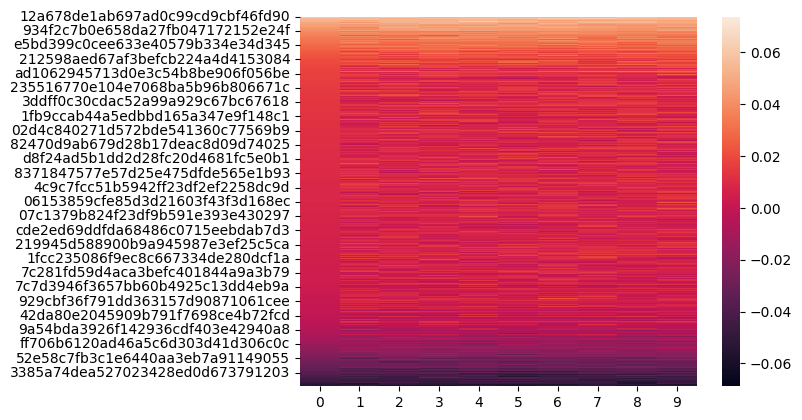

In [6]:
df = pd.DataFrame(loadings[:, 0, :])
df.index = asvs1.columns.values

sn.heatmap(df.sort_values(0, ascending = False))

In [9]:
from scipy.stats import rankdata

def rankColumns(mat):
    return np.array([rankdata(mat[:, i]) for i in range(mat.shape[1])]).transpose()

ranks = [rankColumns(x) for x in harm_loadings]
ranks = np.stack(ranks, axis = 2)

[[[ 276.  273.  273. ...  276.  271.  281.]
  [ 366.  312.  299. ...  302.  312.  329.]
  [  76.   75.   70. ...   60.   71.   80.]]

 [[1919. 2054. 2080. ... 2074. 2029. 2052.]
  [  98.   88.   95. ...   96.   83.   95.]
  [ 505.  476.  520. ...  546.  497.  510.]]

 [[  95.  105.  107. ...   99.   97.  104.]
  [2629. 2462. 2320. ... 2503. 2477. 2425.]
  [2292. 2302. 2303. ... 2297. 2285. 2256.]]

 ...

 [[1277. 1175. 1645. ... 1039. 2240. 1427.]
  [1727. 2474. 1374. ... 1711.  686. 1577.]
  [ 980. 1965. 2112. ... 1218. 1235. 1796.]]

 [[1924. 1594. 1244. ... 1247. 1356. 1177.]
  [1652.  423.  666. ... 1598. 1103. 1372.]
  [1244. 2251. 1008. ...  602. 2287. 1642.]]

 [[ 588. 1918. 1012. ... 1042. 1554.  719.]
  [ 888. 1682. 1368. ... 1521.  603. 1714.]
  [1480. 1547.  366. ... 2211.  431. 2152.]]]


<Axes: >

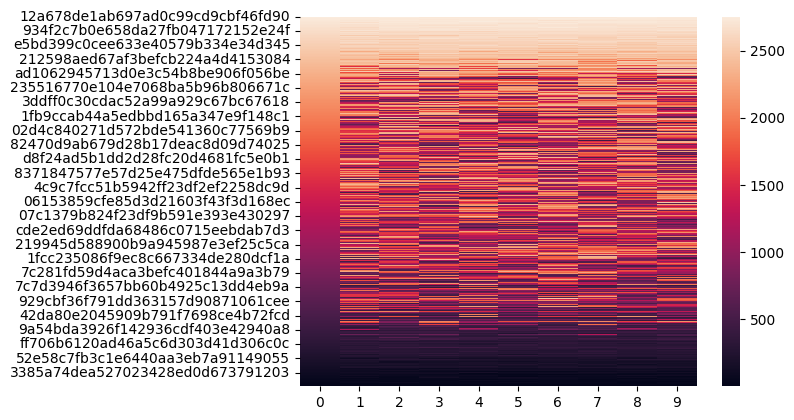

In [11]:
df = pd.DataFrame(ranks[:, 0, :])
df.index = asvs1.columns.values

sn.heatmap(df.sort_values(0, ascending = False))